In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv ('datasets/antropometria-dataset.csv')
df.head(2)

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101


In [48]:
df.columns

Index(['folio', 'intp', 'entidad', 'desc_ent', 'sexo', 'edad', 'meses', 'peso',
       'ropa', 'talla', 'emb', 'temb', 'cintura', 'cadera', 'sistol',
       'diastol', 'hpresion', 'tbrazo', 'htension', 'PrimaryLast', 'code_upm',
       'est_dis', 'est_urb', 'est_marg', 'pondef', 'est_var'],
      dtype='object')

In [68]:
index = list
myPivot = pd.pivot_table(df,
                         index = ['desc_ent'],
                         values = ['peso','ropa'],
                          aggfunc = ['sum'],
                         columns = 'sexo',
                        margins = True)
myPivot

sum                                  \
                                       peso                            ropa   
sexo                                      1           2          All      1   
desc_ent                                                                      
AGUASCALIENTES                    21135.585   22328.765    43464.350    493   
BAJA CALIFORNIA                   18847.440   19768.100    38615.540    402   
BAJA CALIFORNIA SUR               19721.425   18337.450    38058.875    415   
CAMPECHE                          16263.565   19127.830    35391.395    350   
CHIAPAS                           14474.575   20554.600    35029.175    378   
CHIHUAHUA                         18256.550   20870.525    39127.075    415   
COAHUILA DE ZARAGOZA              20593.055   21117.280    41710.335    417   
COLIMA                            18672.705   22504.740    41177.445    410   
DISTRITO FEDERAL                  12086.155   13440.600    25526.755    247   
DURANGO                           17555.845   20930.010    38485.855    425   
GUANAJUATO                        18852.320   23473.570    42325.890    467   
GUERRERO                          16779.865   21616.245    38396.110    431   
HIDALGO                           11793.860   19284.025    31077.885    311   
JALISCO                           15159.285   20390.360    35549.645    352   
MEXICO                            12059.800   15428.625    27488.425    269   
MICHOACAN DE OCAMPO               17124.650   21750.450    38875.100    408   
MORELOS                           13871.550   21457.410    35328.960    361   
NAYARIT                           15897.915   20700.090    36598.005    400   
NUEVO LEON                        20559.255   23012.170    43571.425    427   
OAXACA                            14655.290   20624.750    35280.040    372   
PUEBLA                            12868.310   16822.570    29690.880    358   
QUERETARO                         19758.365   21483.860    41242.225    496   
QUINTANA ROO                      16547.980   20967.540    37515.520    411   
SAN LUIS POTOSI                   20224.615   24299.415    44524.030    537   
SINALOA                           16002.655   18227.135    34229.790    348   
SONORA                            20059.155   21112.830    41171.985    432   
TABASCO                           19460.880   20605.050    40065.930    421   
TAMAULIPAS                        20969.635   21730.395    42700.030    411   
TLAXCALA                          14382.145   19143.970    33526.115    374   
VERACRUZ DE IGNACIO DE LA LLAVE   19466.580   25316.440    44783.020    454   
YUCATAN                           15903.645   20340.605    36244.250    386   
ZACATECAS                         17383.375   20710.070    38093.445    398   
All                              547388.030  657477.475  1204865.505  12776   

                                               
                                               
sexo                                 2    All  
desc_ent                                       
AGUASCALIENTES                     579   1072  
BAJA CALIFORNIA                    466    868  
BAJA CALIFORNIA SUR                440    855  
CAMPECHE                           443    793  
CHIAPAS                            540    918  
CHIHUAHUA                          526    941  
COAHUILA DE ZARAGOZA               439    856  
COLIMA                             543    953  
DISTRITO FEDERAL                   298    545  
DURANGO                            515    940  
GUANAJUATO                         590   1057  
GUERRERO                           570   1001  
HIDALGO                            518    829  
JALISCO                            479    831  
MEXICO                             370    639  
MICHOACAN DE OCAMPO                543    951  
MORELOS                            554    915  
NAYARIT                            542    942  
NUEVO LEON                         530    957  
OAXACA      

In [8]:
type(myPivot)

pandas.core.frame.DataFrame

In [61]:
myPivot.columns

MultiIndex([('median', 'cadera',     1),
            ('median', 'cadera',     2),
            ('median', 'cadera', 'All'),
            ('median',   'peso',     1),
            ('median',   'peso',     2),
            ('median',   'peso', 'All')],
           names=[None, None, 'sexo'])

In [65]:

Holaa = pd.pivot_table(df,
                         index = ['sexo'],
                         values = ['peso','cadera'],
                          aggfunc = ['median'],
                         columns = 'sexo',
                        margins = True)
Holaa

ValueError: Index contains duplicate entries, cannot reshape

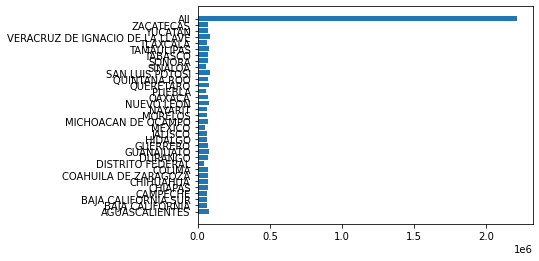

In [53]:
plt.clf()
barras = plt.barh(myPivot.index ,myPivot[('sum', 'sistol', 'All')] )
plt.show()

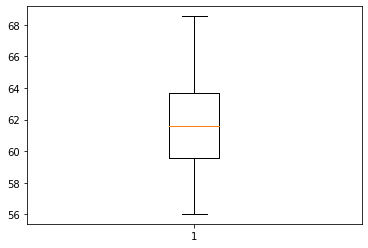

In [59]:
plt.clf()
boxplotsexo1 = plt.boxplot(myPivot[('median', 'peso',     2)], whis= (0,100))

In [ ]:
plt.clf()
boxplotedad = plt.boxplot(myPivot['edad'], whis= (0,80))